<a href="https://colab.research.google.com/github/takeru0208/sample_deep_learning/blob/feature/linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
#真の係数
w_true = torch.Tensor([1, 2, 3])

# Xのデータ 
# torch.ones(100, 1)は 中身が１のtensor100個
# torch.randn(100, 2)は 中身が正規分布の100*2個
# torch.cat は第一引数のtorchを連結する。 第２引数は扱う次元
# これによって100*3の一番左が１，で右がN(0,1)の乱数がふたつ付いたものとなる。
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

# torch.mvは一次元専用のdot、これによって100個のtensorができる。
# これにてy=1+2*x_1+3*x_2 + 誤差 の100個のデータができる。
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
w = torch.randn(3, requires_grad=True)
gamma = 0.1

In [5]:
losses = []

#100エポック回す。
for epoc in range(100):
  #前回のbackwardメソッドで計算された勾配の値の削除
  w.grad = None

  #線形モデルでyの予測値を計算
  y_pred = torch.mv(X, w)

  # MSE loss とwによる微分の計算
  loss = torch.mean((y - y_pred)**2)
  loss.backward()

  # 勾配の更新
  w.data = w.data - gamma * w.grad.data

  losses.append(loss.item())


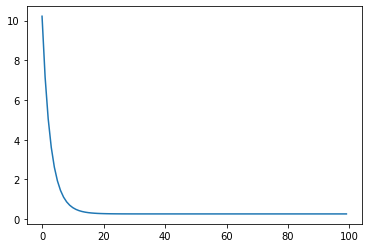

In [11]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [12]:
#tensor([0.9085, 2.0463, 2.9689])
#答えが1,2,3なので大体あってる。
print(w.data)


tensor([0.9085, 2.0463, 2.9689])
